In [1]:
!git clone https://github.com/alneremin/lung-cancer-diagnosis.git

Cloning into 'lung-cancer-diagnosis'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 57 (delta 12), reused 52 (delta 9), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [3]:
!git -C lung-cancer-diagnosis checkout develop

Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'


In [1]:
import sys
import os

sys.path.insert(0, os.path.join("lung-cancer-diagnosis","src"))
!pip install pydicom SimpleITK

In [7]:
!rm -r /content/lung-cancer-diagnosis/src/downloads

In [34]:
import sys
sys.path.remove("lung-cancer-diagnosis/src")

In [3]:
import load_data
from importlib import reload
import os
import sys
import TCIA.tciaclientimpl as tciaclientimpl

reload(tciaclientimpl)
classfile = os.path.join(sys.path[0], "VisualizationTools","category.txt")
annotation_path = os.path.join(sys.path[0], "downloads", "Annotation")
path_to_download = os.path.join(sys.path[0], "downloads")
load_data.download_data(classfile, annotation_path, path_to_download)

https://wiki.cancerimagingarchive.net/download/attachments/70224216/Lung-PET-CT-Dx-Annotations-XML-Files-rev10152020.zip?version=1&modificationDate=1603823290007&api=v2
https://services.cancerimagingarchive.net/services/v3/TCIA/query/getPatient?Collection=Lung-PET-CT-Dx&format=json

Query TCIA - getPatient(Lung-PET-CT-Dx, JSON)
https://services.cancerimagingarchive.net/services/v3/TCIA/query/getPatientStudy?Collection=Lung-PET-CT-Dx&PatientID=Lung_Dx-A0001&format=json

Query TCIA - getPatientStudy(Lung-PET-CT-Dx,Lung_Dx-A0001, JSON)
https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSeries?Collection=Lung-PET-CT-Dx&StudyInstanceUID=1.3.6.1.4.1.14519.5.2.1.6655.2359.165554066086145834377508507990&PatientID=Lung_Dx-A0001&format=json

Query TCIA - getSeries(Lung-PET-CT-Dx, 1.3.6.1.4.1.14519.5.2.1.6655.2359.165554066086145834377508507990, Lung_Dx-A0001, Null, Null, Null, Null, Null, JSON)
https://services.cancerimagingarchive.net/services/v3/TCIA/query/getSOPInstanceUIDs?S

In [ ]:
# thank you https://github.com/1297rohit/VGG16-In-Keras

In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
directory = os.path.join("lung-cancer-diagnosis","src", "downloads", "Lung-PET-CT-Dx")

trdata = ImageDataGenerator()
directory_train = os.path.join(directory, "train")
traindata = trdata.flow_from_directory(directory=directory_train,target_size=(224,224))

tsdata = ImageDataGenerator()
directory_test = os.path.join(directory, "test")
testdata = tsdata.flow_from_directory(directory=directory_test,target_size=(224,224))


Found 512 images belonging to 4 classes.
Found 110 images belonging to 4 classes.


In [16]:
# вычислим кол-во шагов исходя из кол-ва данных при условии, что batch_size=32
steps_per_epoch = len(traindata.filenames) // 32
validation_steps = len(testdata.filenames) // 32

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [7]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor=metric, verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor=metric, min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
iterations = 4
for _ in range(iterations):
  hist = model.fit_generator(steps_per_epoch=steps_per_epoch,generator=traindata, validation_data=testdata, validation_steps=validation_steps,epochs=25)#,callbacks=[checkpoint,early])
  model.save('vgg16_mia_model.h5')
  !cp vgg16_mia_model.h5 "/content/drive/MyDrive/vgg16_mia_model.h5"

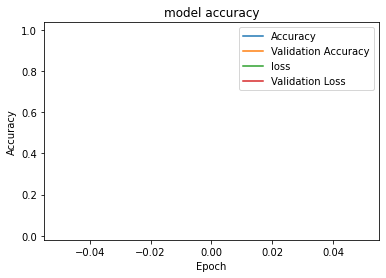

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [26]:
from keras.preprocessing import image
img_path = os.path.join(directory_test, "E", "Lung_Dx-E0005", "000008.jpg")
img = image.load_img(img_path,target_size=(224,224))
img = np.asarray(img)
#plt.imshow(img)
img = np.expand_dims(img, axis=0)
#from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
print([round(i) for i in output[0]])

[0, 0, 1, 0]


In [3]:
!cp "/content/drive/MyDrive/Colab Notebooks/VGG16.ipynb" /content/lung-cancer-diagnosis/VGG16.ipynb

In [29]:
!git -C lung-cancer-diagnosis status

On branch develop
Your branch is up to date with 'origin/develop'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   src/TCIA/tciaclient.py
	modified:   src/load_data.py

no changes added to commit (use "git add" and/or "git commit -a")


In [30]:
!git -C lung-cancer-diagnosis add .

In [31]:
!git -C lung-cancer-diagnosis commit -m "changed load_data and tciaclient" -m "added translator from dcm to jpg; simplified file paths"

[develop e9d14ea] changed load_data and tciaclient
 2 files changed, 39 insertions(+), 21 deletions(-)


In [7]:
!git -C lung-cancer-diagnosis config --global user.email "alneremin@ya.ru"
!git -C lung-cancer-diagnosis config --global user.name "alneremin"

In [19]:
!git -C lung-cancer-diagnosis push origin develop

Counting objects: 14, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (14/14), done.
Writing objects: 100% (14/14), 12.97 KiB | 4.32 MiB/s, done.
Total 14 (delta 9), reused 0 (delta 0)
remote: Resolving deltas: 100% (9/9), completed with 6 local objects.
To https://github.com/alneremin/lung-cancer-diagnosis.git
   49ad19b..50b8b3a  develop -> develop
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
